# Exploratory Data Analysis (EDA) – Retail Sales Dataset

Objective:
To explore, clean, and analyze retail sales data to identify patterns, trends, and business insights.



In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



## Loading the Dataset :

The retail sales dataset is loaded using Pandas. This dataset contains transactional data including customer details, product categories, and sales values.


In [5]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


##  Initial Data Inspection

To understand the structure of the dataset, the first few rows, shape, column names, and data types are examined.


In [14]:
df.shape

(1000, 9)

In [16]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


 ## Statistical Summary

Descriptive statistics are used to summarize the central tendency, dispersion, and distribution of numerical features in the dataset.


In [11]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


##  Data Quality Checks

The dataset is checked for missing values and duplicate records to ensure data quality before analysis.


In [12]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df['Date']= pd.to_datetime(df['Date'])

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


##  Univariate Analysis

Univariate analysis is performed to understand the distribution of individual variables such as:
- Gender distribution
- Product categories
- Customer age distribution
- Quantity Purchased
- Total  Sales Amount Distribution 


In [23]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

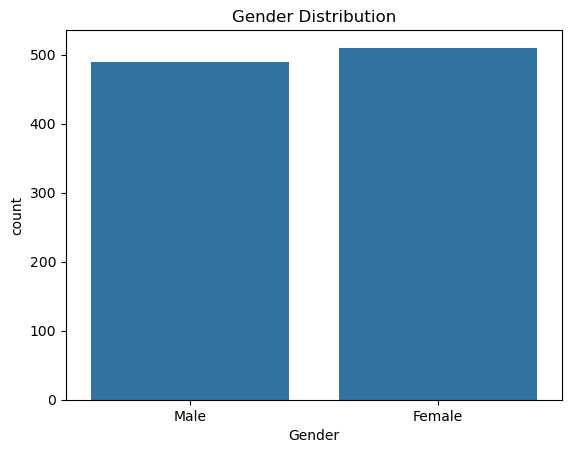

In [24]:
sns.countplot(x='Gender',data=df)
plt.title('Gender Distribution')
plt.show()

In [26]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

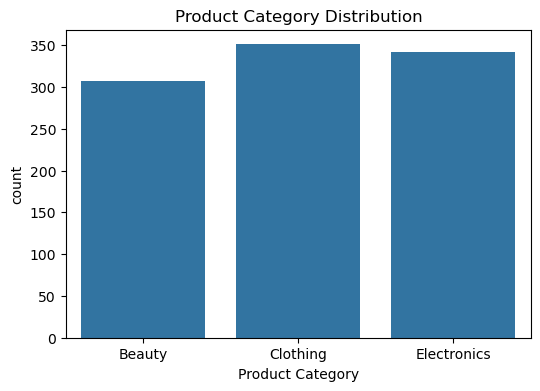

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category',data=df)
plt.title('Product Category Distribution')
plt.show()

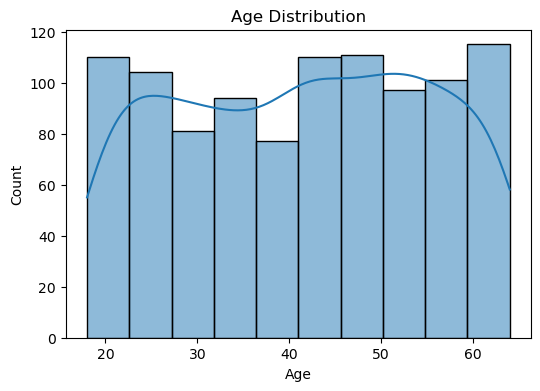

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()


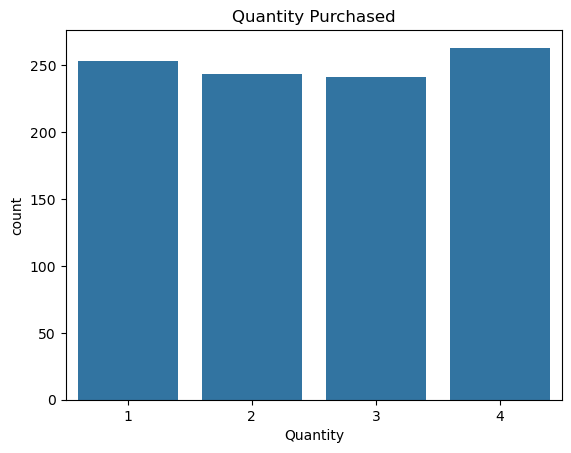

In [29]:
sns.countplot(x='Quantity', data=df)
plt.title('Quantity Purchased')
plt.show()


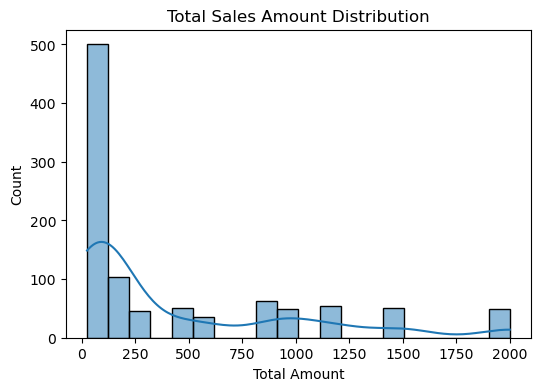

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(df['Total Amount'], bins=20, kde=True)
plt.title('Total Sales Amount Distribution')
plt.show()


##  Bivariate Analysis

Bivariate analysis helps identify relationships between two variables, such as:
- Gender vs Total Sales
- Product Category vs Total Sales
- Age vs Total Amount
- Quantity vs Total Amount



In [31]:
df.groupby('Gender')['Total Amount'].sum()

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

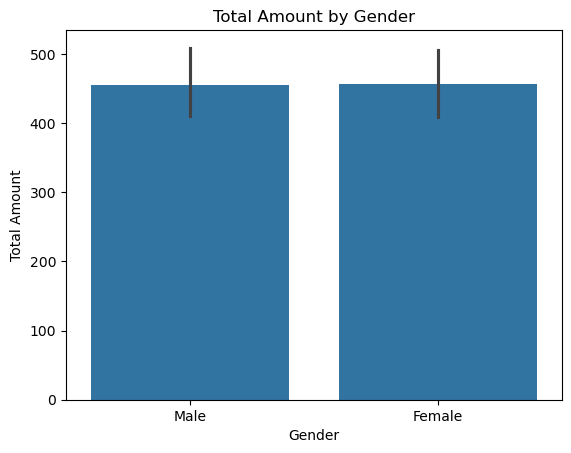

In [32]:
sns.barplot(x='Gender', y='Total Amount',data=df)
plt.title('Total Amount by Gender')
plt.show()

In [34]:
df.groupby('Product Category')['Total Amount'].sum()


Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

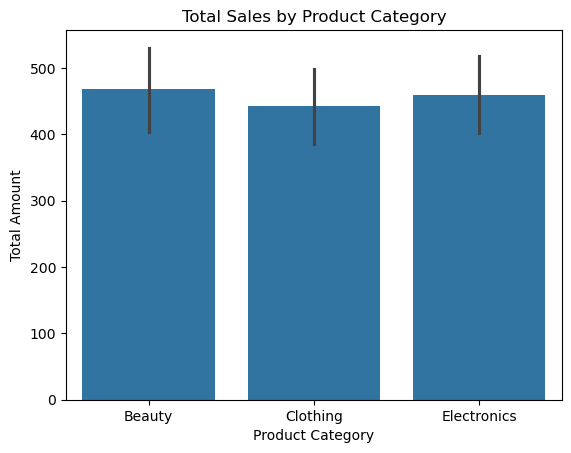

In [37]:
sns.barplot(x='Product Category', y='Total Amount', data=df)
plt.title('Total Sales by Product Category')
plt.show()


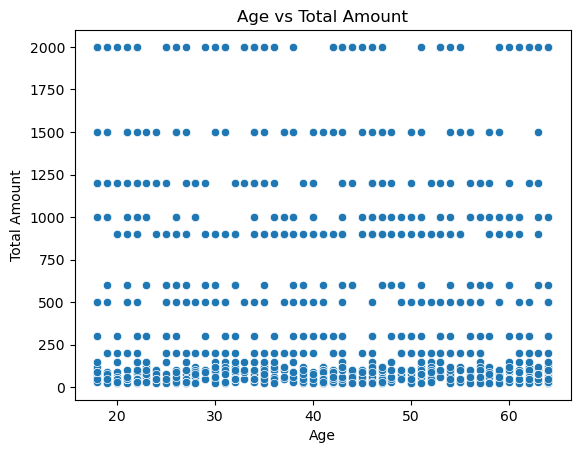

In [38]:
sns.scatterplot(x='Age', y='Total Amount', data=df)
plt.title('Age vs Total Amount')
plt.show()


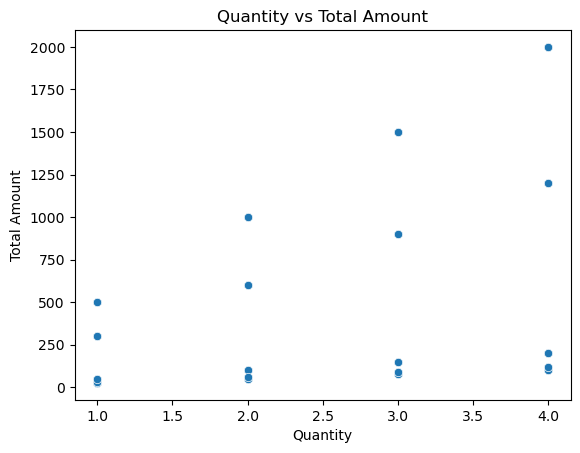

In [39]:
sns.scatterplot(x='Quantity', y='Total Amount', data=df)
plt.title('Quantity vs Total Amount')
plt.show()


##  Correlation Heatmap

A correlation heatmap is used to visualize the relationship between numerical variables in the dataset.  
It helps identify how strongly variables such as age, quantity, price per unit, and total amount are related to each other.


In [40]:
df[['Age','Quantity','Price per Unit','Total Amount']].corr()

,Age,Quantity,Price per Unit,Total Amount
Age,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.060568,0.373707,0.851925,1.000000


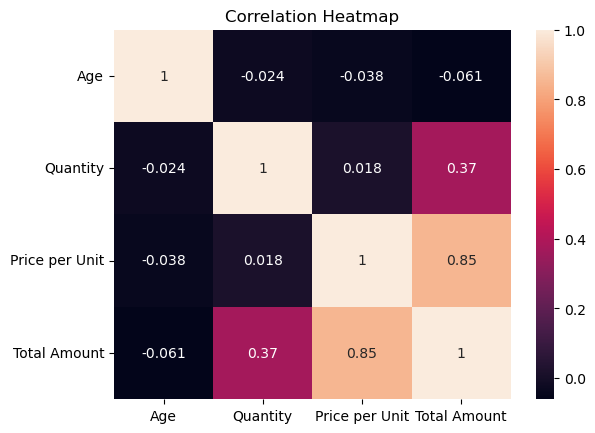

In [41]:
sns.heatmap(
    df[['Age','Quantity','Price per Unit','Total Amount']].corr(),annot=True
)
plt.title('Correlation Heatmap')
plt.show()

##  Monthly Sales Trend

Monthly sales trends are analyzed to observe seasonal patterns and variations in total sales over time.


In [42]:
df['Month']=df['Date'].dt.month
df.groupby('Month')['Total Amount'].sum()

Month
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64

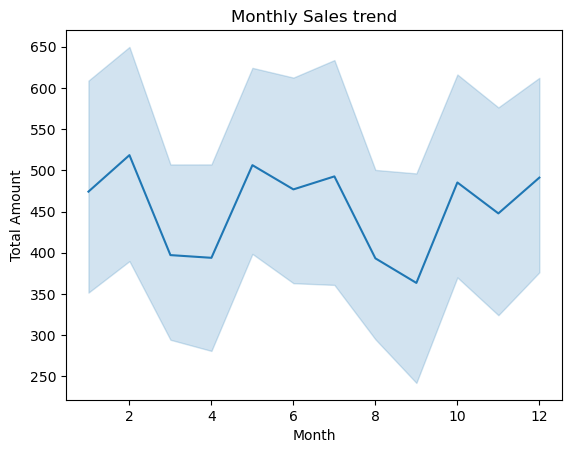

In [43]:
sns.lineplot(x='Month',y='Total Amount',data=df)
plt.title('Monthly Sales trend')
plt.show()

 Key Insights :

- The dataset contains 1000 transactions with no missing or duplicate values.
- Clothing is the most frequently purchased product category.
- Male customers contribute slightly higher total sales compared to females.
- Most customers fall within the 25–45 age range.
- Monthly sales show noticeable variation, indicating seasonal trends.


Conclusion :

This exploratory data analysis of the retail sales dataset provided insights into customer demographics, product performance, and sales trends. The analysis can help businesses optimize inventory, target the right customer segments, and improve overall sales strategy.
